# 1.讀取資料

透過 Kaggle 資料競賽網站，下載波士頓房價資料集。(Link: https://www.kaggle.com/competitions/boston-housing/data)

(點擊 "Download All" 後解壓縮，並透過下方程式碼上傳 submission_example.csv, test.csv , train.csv 三份檔案)

※ 可一次上傳或分批上傳，上傳成功後，點擊左方 "Files" 欄位，即可看到上傳的檔案。

## 波士頓房價資料集


欄位名稱	|說明
 :------| :------
CRIM	|按城鎮劃分的人均犯罪率
ZN	|超過25,000平方英尺的土地劃為住宅用地的比例
INDUS	|城鎮非零售商用土地的比例
CHAS	|Charles River虛擬變數（如果靠近河流，則為1；否則為0）
NOX	|一氧化氮濃度（以百萬分之幾為單位）
RM	|每個住宅的平均房間數
AGE	|1940年之前建造自有單位的比例
DIS	|到五個波士頓就業中心的加權距離
RAD	|徑向公路的可達性指數
TAX	|每10,000美元的全值財產稅率
PTRATIO	|城鎮的師生比例
B	|1000(Bk-0.63)^ 2，其中Bk是按城鎮劃分的黑人比例
LSTAT	|低階人口狀況百分比
MEDV	|自有住房的中位數價格（單位為1000美元）

In [1]:
# 忽略警告訊息
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
boston_dataset = load_boston()
print(boston_dataset.DESCR)
data = datasets.load_boston()

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submit = pd.read_csv('submission_example.csv')

print('train',df_train.shape)
display(df_train.head(5))
print('test',df_test.shape)
display(df_test.head(5))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


test (173, 14)


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [2]:
# 合併train及test的資料 

df_data = df_train.append(df_test)
df_data

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,496,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,NaN
169,497,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,NaN
170,499,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,NaN
171,501,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,NaN


合併後訓練測試集總共有506筆資料、15個特徵欄位，做出一致性的預測分析及模型訓練就會比較快速好理解。

# 2.線性迴歸

首先，要使用簡單的資料視覺來看一下細部資料之間的關係，用MEDV房價變數做分佈的線性迴歸常態預測。

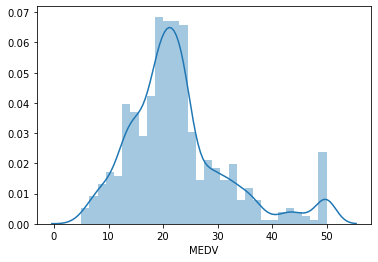

In [3]:
boston = pd.DataFrame(boston_dataset.data,
                     columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
sns.distplot(boston['MEDV'], bins=30)

接者我們可以看每個變數之間的關係，透過相關係數觀察特徵變數和目標變數有較高的關聯性。

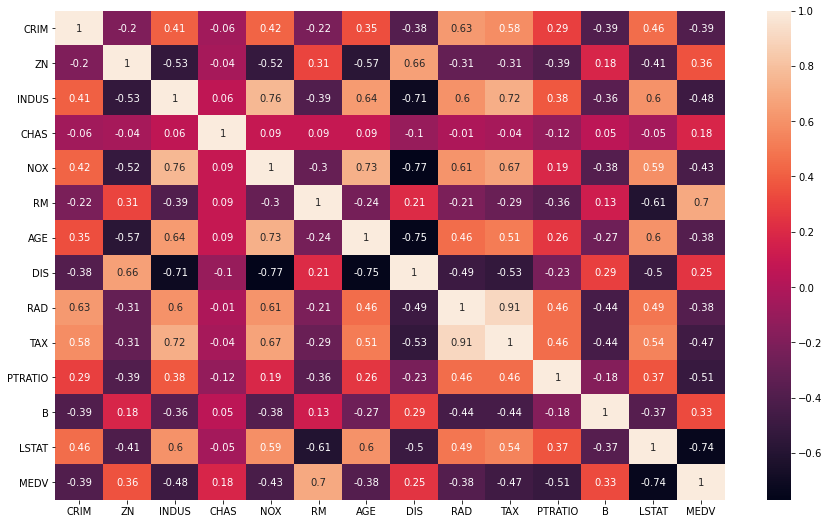

In [4]:
#使用熱度圖產生模型圖
correlation_matrix = boston.corr().round(2)
plt.figure(figsize=(15,9))
sns.heatmap(correlation_matrix, annot=True)

使用LSTAT和RM來做出預測MEDV的模型。用下列的算數及預測圖將關係數值給分析出來，可以明顯看到兩者之間的關係會是怎麼樣。

In [5]:
X = boston.loc[:,"RM":"LSTAT"].values
Y = boston.MEDV
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=9487)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("MAE =","%.4f" % mae)
print("MSE =","%.4f" % mse)
print("R2 =","%.4f" % r2)

MAE = 3.5028
MSE = 26.4660
R2 = 0.7124


列印出來的模型的平均絕對物誤差3.5028、均方誤差26.4660、判定係數為得到的平均於71%，代表它的分析程度是相當好的。

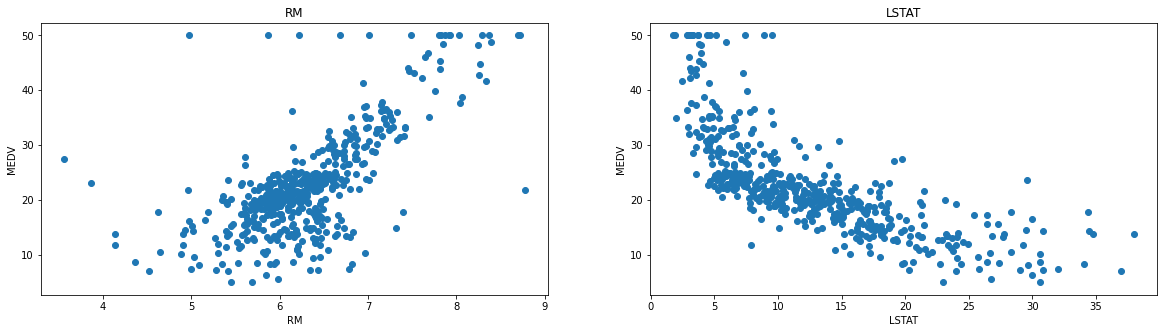

In [6]:
# 設定整張圖的長寬
plt.figure(figsize=(20, 5))
features = ["RM","LSTAT"]
target = boston['MEDV']
for i, col in enumerate(features):
# 排版1 row, 2 columns, nth plot：在jupyter notebook上兩張並排 
 plt.subplot(1, len(features) , i+1)
 # add data column into plot
 x = boston[col]
 y = target
 plt.scatter(x, y, marker='o')
 plt.title(col)
 plt.xlabel(col)
 plt.ylabel('MEDV')

左圖：(RM與MEDV)住宅的平均房間數與房子的中位數價格產生了正向關係，也就是說平數越多價錢就會變高，看個人需求而自行決定。
右圖：(LSTAT與MEDV)人口數量與房子的中位數價格產生了負向關係，人口大於房子數量就會影響了遮風避雨無家可歸的現象發生。

# 3.產生模型的重要性

使用13個特徵產生出多張的模型，此模型會跟上述熱度圖很類似，因為執行要一點時間就挑選前幾個特徵做執行，再讀取前8筆的資料訓練出來的模型去預測。

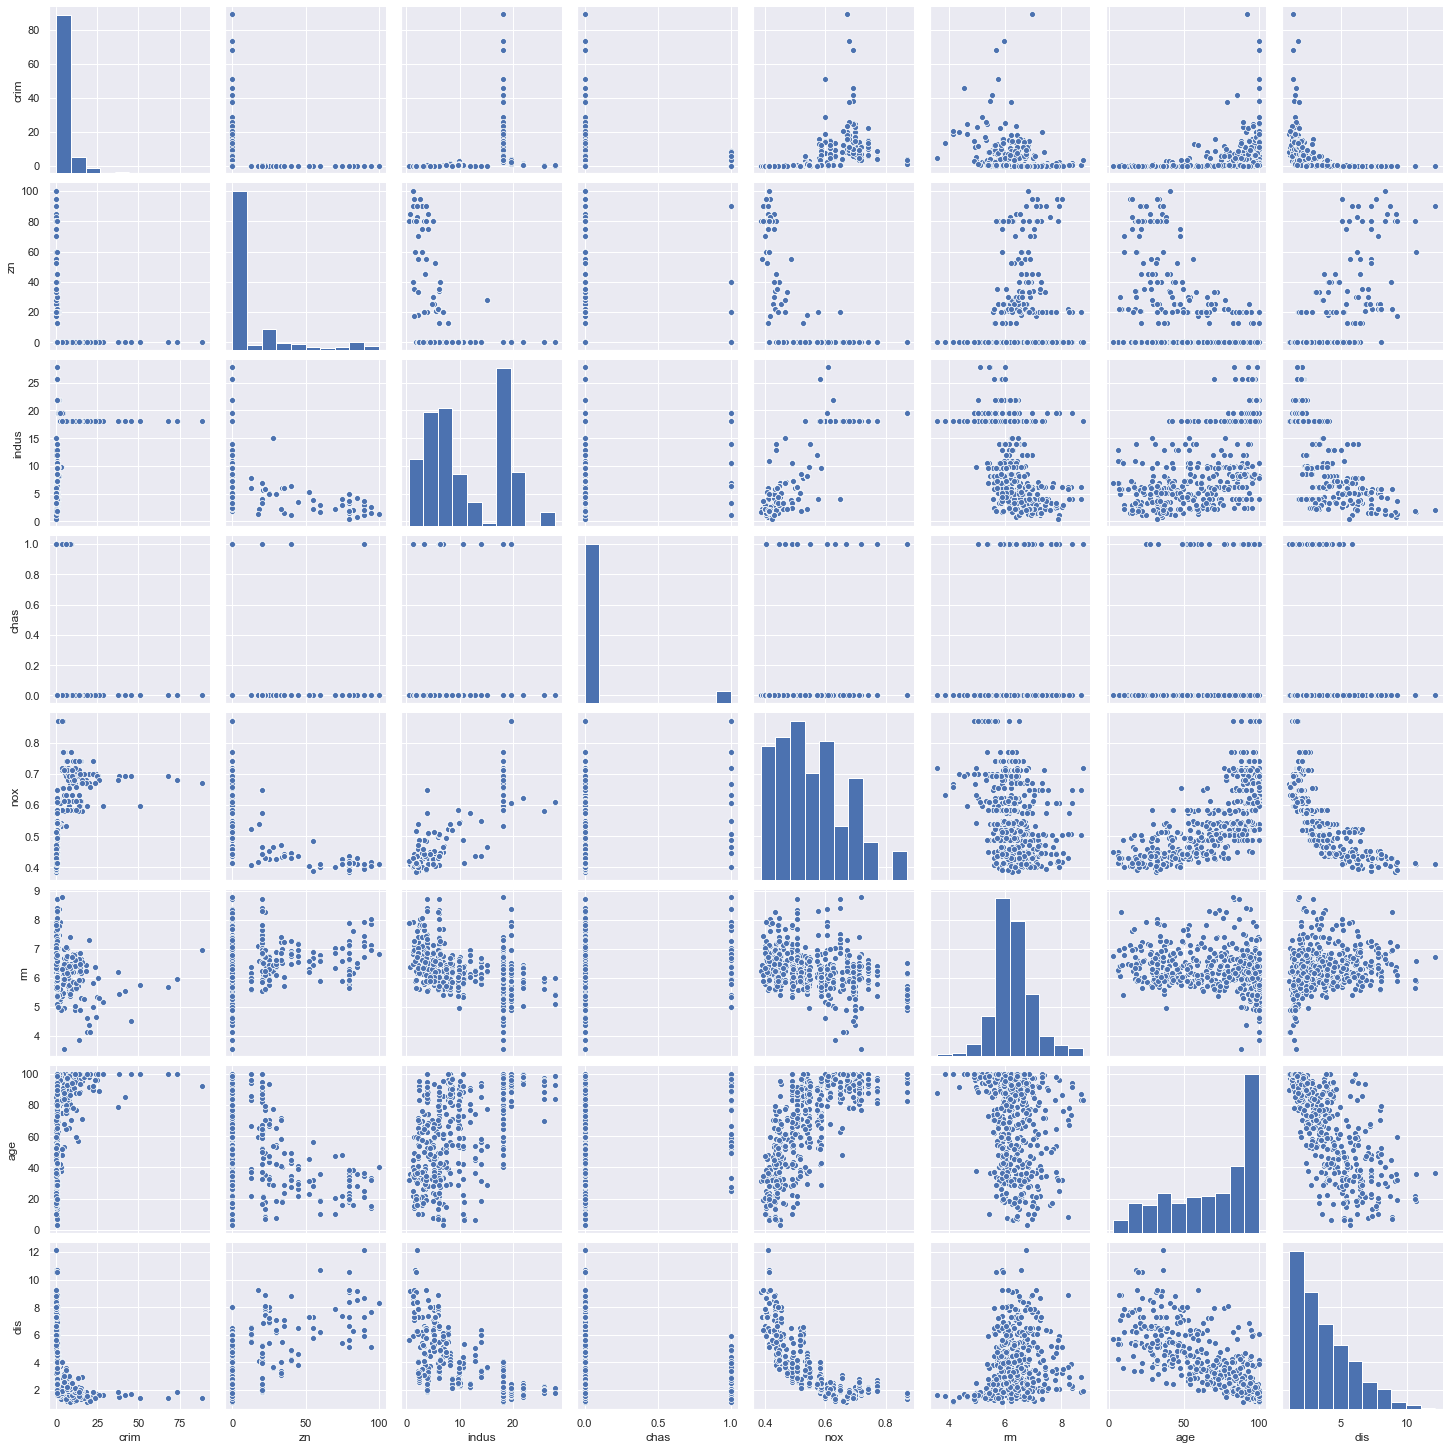

In [7]:
sns.set()
cols = ['crim','zn','indus','chas','nox','rm','age','dis']
sns.pairplot(df_data[cols], size = 2.5)
plt.show()

In [8]:
boston = load_boston()
df = pd.DataFrame(data=boston.data, 
                  columns=boston.feature_names)
df['MEDV'] = boston.target

# MEDV即預測目標向量
X = df.iloc[:, :-1]
y = df['MEDV']
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


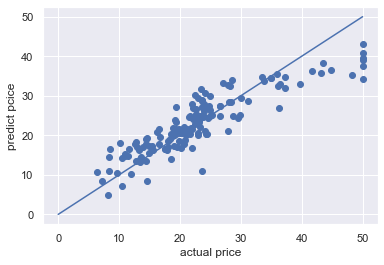

In [9]:
x = data.data # 13個特徵的數據
y = data.target # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

y_predict = lnregr.predict(x_test) # 北test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

In [10]:
lnregr.score(x_train, y_train)

0.7103879080674731

執行後訓練出來的特徵數值維71%，預測值機率只有7成，難以預測房價的特性狀況，換個其他資料做預測依然還是大同小異。

# 4.PCA降維

訓練測試集總共有506筆資料、15個特徵欄位，使用的數據量會不足，因此我們使用降維方式做出線性圖模型。

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

x = data.data # pca降維後的數據
y = data.target # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

# Standarize our training data
std_tool = StandardScaler()
std_tool.fit(x_train)
x_train = std_tool.transform(x_train)

# PC降維
pca = decomposition.PCA(n_components=0.95)
pca.fit(x_train)
x_train = pca.transform(x_train)

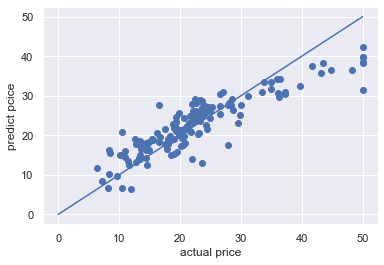

In [12]:
lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

# Standarize x_test
x_test = std_tool.transform(x_test)

# Dimension reduction usng PCA
x_test = pca.transform(x_test)
y_predict = lnregr.predict(x_test) # 將test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,50], [0,50]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

In [13]:
lnregr.score(x_train, y_train) # 訓練模型的正確率

0.6649582793264731

PCA降維所訓練出來得到的為67%，由此可知低，於了上述的訓練出的模型，解釋程度能說是相當好的。

In [14]:
submit.to_csv( 'New_SampleSubmission1.csv', index=False )
print( f'預測結果：' )
submit.head(20)

預測結果：


,ID,medv
0,3,22.768769
1,6,22.768769
2,8,22.768769
3,9,22.768769
4,10,22.768769
5,18,22.768769
6,20,22.768769
7,25,22.768769
8,26,22.768769
9,27,22.768769


使用 Kaggle 上波士頓房價預測比賽，使用了房子數量、人口數量做出相關關資料的分析及處理技巧，也用線性迴歸預測、產生模型的重要性及降維來預測、觀察及嘗試。畢竟房價不像用斤兩來秤有絕對的標準，更何況房價還要依賣方的心情，當前的通膨，人均所得，根本就沒有標準。人量不出來的，更別想叫電腦算的準。不過，我們自已調整及建立的模型，將 score 調到最高，雖說還是不準確，但絕對是值得參考的依據。